# Stroke Prediction

# Exploratory Data Analysis

In [602]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE


In [603]:
# Read the dataset
df = pd.read_csv('stroke-prediction-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [604]:
# inspecting Dataset Structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 0 to 5118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5119 non-null   int64  
 1   gender             5119 non-null   object 
 2   age                5119 non-null   float64
 3   hypertension       5119 non-null   int64  
 4   heart_disease      5119 non-null   int64  
 5   ever_married       5119 non-null   object 
 6   work_type          5119 non-null   object 
 7   Residence_type     5119 non-null   object 
 8   avg_glucose_level  5119 non-null   float64
 9   bmi                4917 non-null   float64
 10  smoking_status     5119 non-null   object 
 11  stroke             5119 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 480.0+ KB


In [605]:
# Dimensions of dataset
df.shape

(5119, 12)

In [606]:
# describe the data
round(df.describe(include='all'), 2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5119.00,5119,5119.00,5119.0,5119.00,5119,5119,5119,5119.00,4917.00,5119,5119.00
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,3000,NaN,NaN,NaN,3358,2927,2601,NaN,NaN,1896,NaN
mean,36518.70,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.13,28.90,NaN,0.05
std,21159.35,NaN,22.63,0.3,0.23,NaN,NaN,NaN,45.25,7.86,NaN,0.22
min,67.00,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,17742.50,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.27,23.50,NaN,0.00
50%,36942.00,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,54669.00,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [607]:
# Drop the id column as it is not required
df.drop('id',axis =1, inplace = True)

In [608]:
# Removing duplicate rows
df.drop_duplicates(inplace = True)

In [609]:
# Dimensions of dataset
df.shape

(5110, 11)

In [610]:
# identifying missing value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [611]:
# Calculating percentage of missing value in data set
((df.isna().sum())/(len(df)))*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

# Handeling missing data 

In [613]:
# Fill the missing “bmi” values with the median of “bmi” column.

b = df['bmi'].isna().sum()
bmi_median = df['bmi'].median(skipna = True)
df.fillna(bmi_median, inplace=True)

# Checking Outlier using boxplot

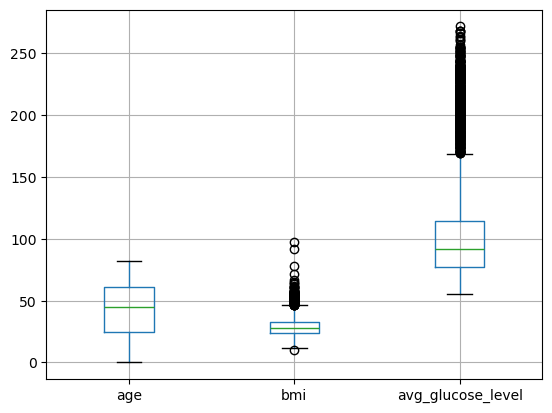

In [615]:
# plotting box plot to check outliers for numerical value
df.boxplot(column =['age', 'bmi','avg_glucose_level'])
plt.show()

# Handeling outlier using logarithmic function

In [617]:
# Applying Logarithmic for handeling outlier

# Logarithmic BMI
df.loc[:,'bmi'] = np.log(df['bmi']+1)
df.loc[:,'avg_glucose_level'] = np.log(df['avg_glucose_level']+1)

# Visualization

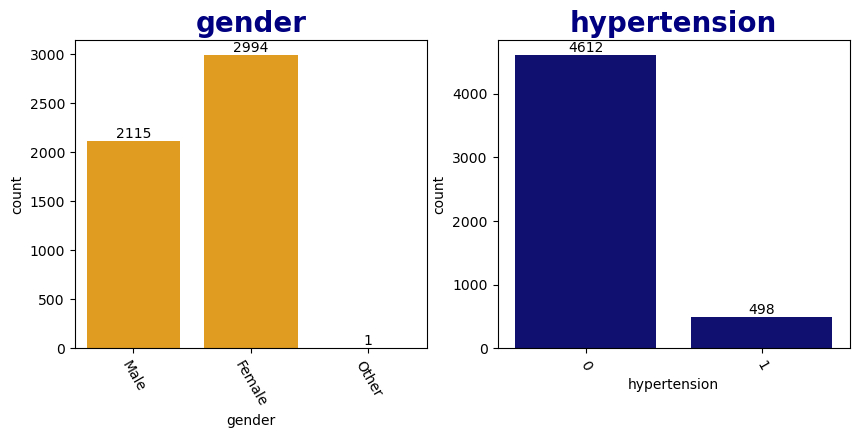

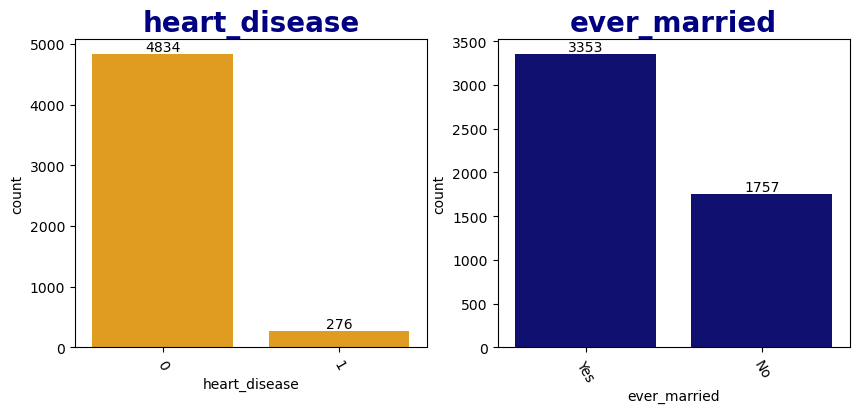

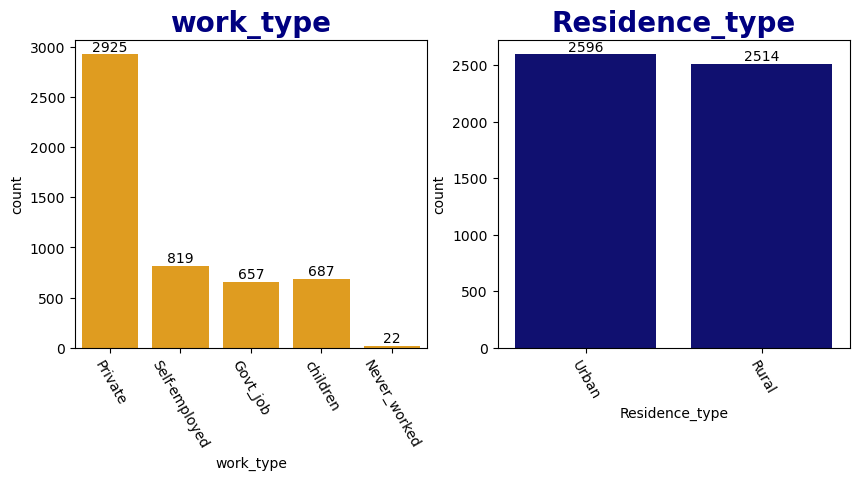

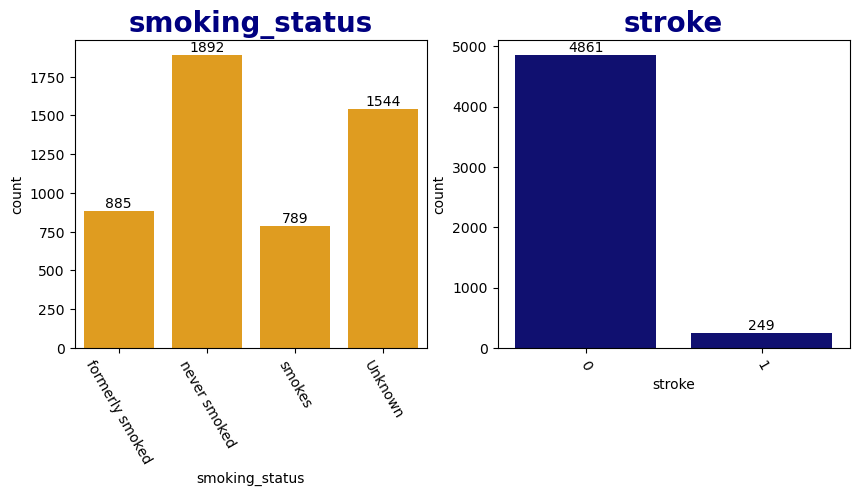

In [619]:
# plotting the graph for all the Attribute
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

i=0
while i<8 :
    
    # Left AX
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=df, color='orange')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    # Right AX
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=df, color='navy')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

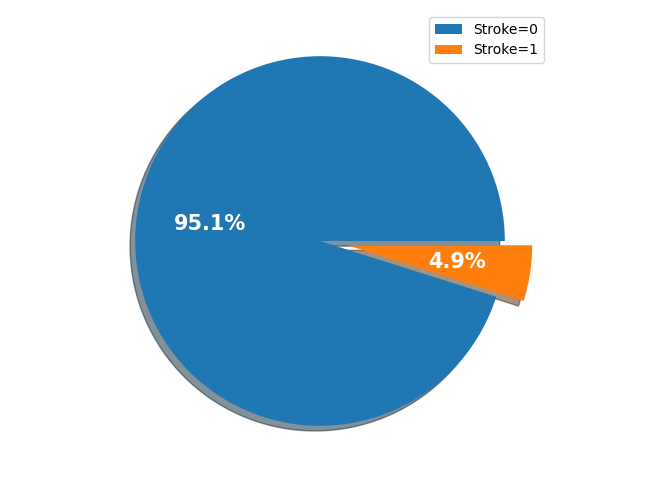

In [620]:
x = df['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()


# Encoding categorical data into discrete value

In [622]:
# Replacing categorical value with unique values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: label_encoder.fit_transform(x))
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,5.436731,3.627004,1,1
1,0,61.0,0,0,1,3,0,5.314240,3.370738,2,1
2,1,80.0,0,1,1,2,0,4.672081,3.511545,2,1
3,0,49.0,0,0,1,2,1,5.148831,3.566712,3,1
4,0,79.0,1,0,1,3,0,5.165471,3.218876,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,4.439706,3.370738,2,0
5106,0,81.0,0,0,1,3,1,4.837868,3.713572,2,0
5107,0,35.0,0,0,1,3,0,4.430698,3.453157,2,0
5108,1,51.0,0,0,1,2,0,5.119729,3.280911,1,0


# Feature Scaling 

In [624]:
# Feature Scaling using Min-Max Normalization
X_temp = df.drop(columns = 'stroke')
y = df.stroke
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.207143,0.526692,0.097456,0.054012,0.656164,0.541928,0.508023,0.364100,0.434048,0.458969
std,0.246522,0.276033,0.296607,0.226063,0.475034,0.272573,0.499985,0.226889,0.115642,0.357178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.500000,0.000000,0.210213,0.362855,0.000000
50%,0.000000,0.548340,0.000000,0.000000,1.000000,0.500000,1.000000,0.318698,0.436666,0.666667
75%,0.500000,0.743652,0.000000,0.000000,1.000000,0.750000,1.000000,0.454276,0.505781,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [690]:
# Confusion Matrix Function
def plot_confusion_matrix(y_test, y_prediction, title):
    cm = confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Reds")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title(title +' Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

# Data Modeling using Decision Tree Classifier before balancing data

In [626]:
# spliting the train - test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# initializing Classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtc.predict(X_test)

In [627]:
# confusion Matrix
confusionM = confusion_matrix(y_test,y_pred)
confusionM

array([[1213,    0],
       [  65,    0]])

In [628]:
# Calculating accuracy 
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

94.91392801251956

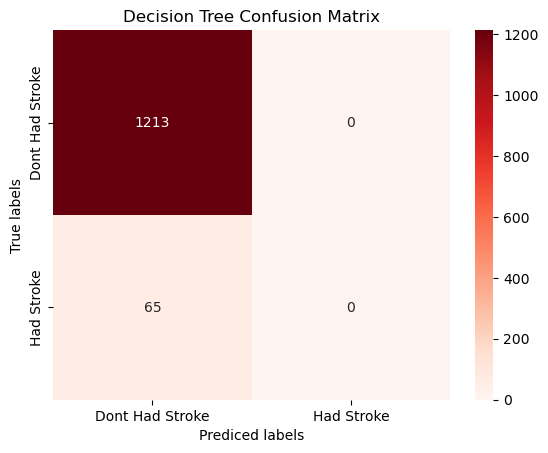

In [630]:
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

In [631]:
cr = classification_report(y_test, y_pred, zero_division = 0)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



# Data Modeling using K Neighbour Classifier before balancing data

In [632]:
# Training with KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn_cv = knn.fit(X_train, y_train)

y_pred_knn = knn_cv.predict(X_test)
print('accuracy : ', accuracy_score(y_test, y_pred_knn)*100)

accuracy :  94.75743348982786


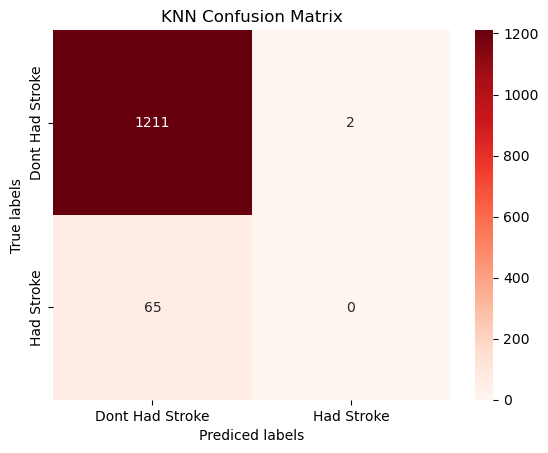

In [633]:
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')


In [634]:
cr = classification_report(y_test, y_pred_knn, zero_division = 0)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1213
           1       0.00      0.00      0.00        65

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.90      0.95      0.92      1278



# Imbalanced Data

In [636]:
# Since the data is imbalanced, recall is zero and the model is biased. 
# This could effect the analysis as well. Therefore, its better to use Over Sampling Techniques to handle the imbalance.

In [637]:
# Applying the Synthetic Minority Over-sampling Technique (SMOTE) to balance the prediction variable “stroke”.

X = df.drop('stroke',axis=1)
y = df['stroke']

sm = SMOTE(random_state=42,k_neighbors=5)

X_resampled, y_resampled = sm.fit_resample(X, y)

resampled_df = X_resampled
resampled_df['stroke']=y_resampled

resampled_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.000000,0,1,1,2,1,5.436731,3.627004,1,1
1,0,61.000000,0,0,1,3,0,5.314240,3.370738,2,1
2,1,80.000000,0,1,1,2,0,4.672081,3.511545,2,1
3,0,49.000000,0,0,1,2,1,5.148831,3.566712,3,1
4,0,79.000000,1,0,1,3,0,5.165471,3.218876,2,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,0,79.000000,0,0,1,3,0,5.401914,3.305103,2,1
9718,0,70.969620,0,0,1,0,1,5.571939,3.687434,2,1
9719,1,80.000000,0,0,1,2,0,4.928023,3.504603,2,1
9720,0,75.000000,0,0,1,2,0,4.422071,3.406830,0,1


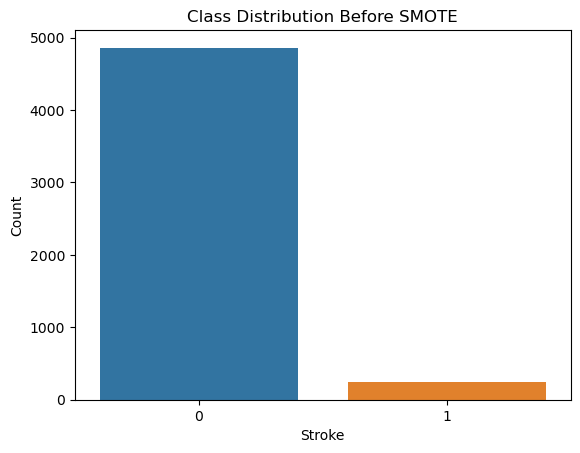

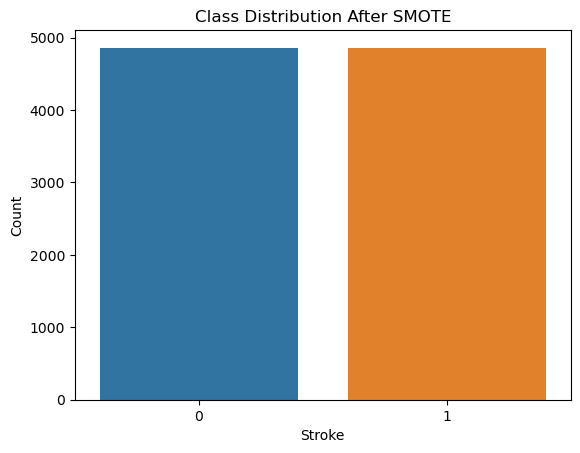

In [638]:
#Drawing the bar plot before and after applying the SMOTE.

#BEFORE
sns.countplot(x=df.stroke,legend=False, hue=df.stroke)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

#AFTER
sns.countplot(x=resampled_df.stroke, legend=False, hue=resampled_df.stroke)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Feature Scaling after SMOTE

In [640]:
# Feature Scaling the balanced data.

X_value_sampled = resampled_df.drop(columns ='stroke')
y_sampled = resampled_df.stroke

standardScaler = MinMaxScaler().fit_transform(X_value_sampled)
X_sampled = pd.DataFrame(standardScaler, columns=X_value_sampled.columns)

In [641]:
# Splitting the balanced data into training and testing data.

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, random_state=0, test_size=0.25)

# Data Modeling using Decision Tree Classifier after balancing data

In [643]:
# Training the data using DecisionTree Classifier with the balanced data

dtc.fit(X_train_sampled,y_train_sampled)
y_predicted = dtc.predict(X_test_sampled)

print('accuracy : ',accuracy_score(y_test_sampled,y_predicted)*100)

accuracy :  79.47346770876183


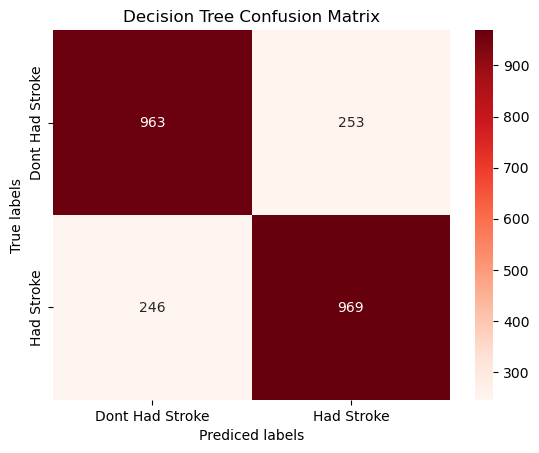

In [644]:
plot_confusion_matrix(y_test_sampled, y_predicted, 'Decision Tree')

In [645]:
print('Classification Report : \n',classification_report(y_test_sampled, y_predicted, zero_division=0))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1216
           1       0.79      0.80      0.80      1215

    accuracy                           0.79      2431
   macro avg       0.79      0.79      0.79      2431
weighted avg       0.79      0.79      0.79      2431



# Data Modeling using K Neighbour Classsifier after balancing data

In [647]:
# Training with KNeighborsClassifier with balanced data

knn = KNeighborsClassifier(n_neighbors=5,p=1)
knn_cv = knn.fit(X_train_sampled,y_train_sampled)

y_pred_knn = knn_cv.predict(X_test_sampled)
print('accuracy : ', accuracy_score(y_test_sampled,y_pred_knn)*100)


accuracy :  87.2069107363225


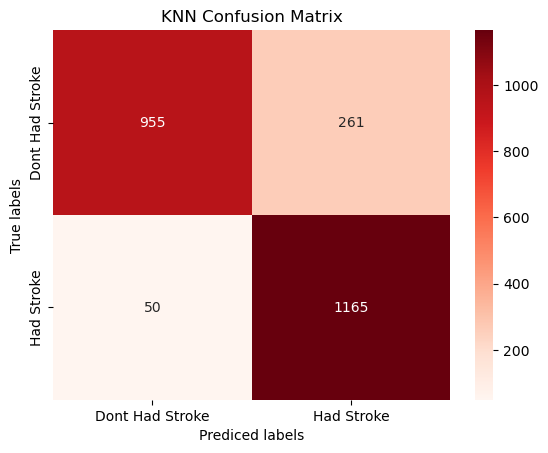

In [648]:
plot_confusion_matrix(y_test_sampled, y_pred_knn, "KNN")

In [649]:
print('Classification Report : \n',classification_report(y_test_sampled, y_pred_knn, zero_division=0))

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      1216
           1       0.82      0.96      0.88      1215

    accuracy                           0.87      2431
   macro avg       0.88      0.87      0.87      2431
weighted avg       0.88      0.87      0.87      2431



# Conclusion: